# INTRODUCTION

# BUSINESS PROBLEM

Predict bad performance of workers. Focus on predicting bad performance, dont want to miss any of those. Focus on maximizing true negatives and false positives while tackling overfitting.

# IMPORTS

In [1]:
# core operational packeges
import os
import warnings

# dataset manupulation
import pandas as pd
pd.set_option('display.max_columns', 0)
import numpy as np
from IPython.display import display, HTML

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
# import plotly.graph_objs as go
# import plotly.express as px

In [9]:
# Machine Learning
# preprocessing
from sklearn import set_config
from sklearn.model_selection import train_test_split#, cross_val_predict, cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
# from imblearn.over_sampling import SMOTE,SMOTENC


# model
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [10]:
# # Model Explainers
# import shap
# print(shap.__version__)
# shap.initjs()

In [11]:
# custom functions loader
%load_ext autoreload
%autoreload 2
import functions as fun

# notebook styling packages
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks='True', grid='False')
## to reset to default theme
# jtplot.reset()

# OBTAIN

# SCRUB & EXPLORE

## data

In [19]:
# loading data
df = pd.read_csv('./data/garments_worker_productivity.csv')

In [20]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [21]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [22]:
fun.check_NaN(df)

,name,is_null,not_null
0,date,0,1197
1,quarter,0,1197
2,department,0,1197
3,day,0,1197
4,team,0,1197
5,targeted_productivity,0,1197
6,smv,0,1197
7,wip,506,691
8,over_time,0,1197
9,incentive,0,1197


In [23]:
fun.check_duplicates(df, verbose=True)

date >> number of uniques: 59
['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']
____________________________________________________________
quarter >> number of uniques: 5
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
____________________________________________________________
department >> number of uniques: 3
['sweing' 'finishing ' 'fini

,name,duplicated,not_duplicated
0,date,1138,59
1,quarter,1192,5
2,department,1194,3
3,day,1191,6
4,team,1185,12
5,targeted_productivity,1188,9
6,smv,1127,70
7,wip,648,549
8,over_time,1054,143
9,incentive,1149,48


In [24]:
df.describe().transpose().style.format("{0:,.0f}")

,count,mean,std,min,25%,50%,75%,max
team,"1,197",6,3,1,3,6,9,12
targeted_productivity,"1,197",1,0,0,1,1,1,1
smv,"1,197",15,11,3,4,15,24,55
wip,691,"1,190","1,837",7,774,"1,039","1,252","23,122"
over_time,"1,197","4,567","3,349",0,"1,440","3,960","6,960","25,920"
incentive,"1,197",38,160,0,0,0,50,"3,600"
idle_time,"1,197",1,13,0,0,0,0,300
idle_men,"1,197",0,3,0,0,0,0,45
no_of_style_change,"1,197",0,0,0,0,0,0,2
no_of_workers,"1,197",35,22,2,9,34,57,89


In [25]:
# fun.df_distribution(df,color_plot='green')

## Feature engineering

### Creating target; `performance`

In [26]:
# # Multiclass target, labaled
# # empty list to hold data
# lst = []
# for x in zip(df.targeted_productivity, df.actual_productivity):
#     # % change in variables
#     delta = np.log(x[1] / x[0])
#     if delta < 0:
#         lst.append('below')
#     elif 0 <= delta < .25:
#         lst.append('met')
#     elif delta >= .25:
#         lst.append('above')
#     # error hadeler
#     else:
#         lst.append('?')
# df['performance'] = lst

In [27]:
# # binary target class, labaled
# lst = []
# for x in zip(df.targeted_productivity, df.actual_productivity):
#     # % change in variables
#     delta = np.log(x[1] / x[0])
#     if delta < 0:
#         lst.append('not_met')
#     else:
#         lst.append('met')
# df['performance'] = lst

In [28]:
# binary target class, int
lst = []
for x in zip(df.targeted_productivity, df.actual_productivity):
    # % change in variables
    delta = np.log(x[1] / x[0])
    if delta < 0:
        lst.append(0)
    else:
        lst.append(1)
df['performance'] = lst

In [29]:
# # Multiclass target, int
# # empty list to hold data
# lst = []
# for x in zip(df.targeted_productivity, df.actual_productivity):
#     # % change in variables
#     delta = np.log(x[1] / x[0])
#     if delta < 0:
#         lst.append(0)
#     elif 0 <= delta < .25:
#         lst.append(1)
#     elif delta >= .25:
#         lst.append(2)
#     # error hadeler
#     else:
#         lst.append('?')
# df['performance'] = lst

In [30]:
df.performance.value_counts()

1    875
0    322
Name: performance, dtype: int64

### binning `wip`

In [31]:
# filling NaN's with 0, meaning no wip for that session
df['wip'] = df['wip'].fillna(0)
# intervals for binning
bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 150), 
                                     (150, 500), (500, 2500),
                                     (2500, 1e6)],
                                    closed='left')
# binning
wip_size = pd.cut(df['wip'].tolist(), bins=bins)
# naming categories
wip_size.categories = ['no_wip', 'small', 'med', 'large', 'xl']
# appending to df
df['wip_size'] = wip_size

### text cleaning in `department` categories 

In [32]:
# cleaning spaces
df['department'] = df['department'].str.strip()
# checking
df['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

### drop features

In [33]:
df.drop(columns=['date', 'wip', 'actual_productivity'], inplace=True)

### dtype casting

In [34]:
df['quarter'] = df['quarter'].astype('category')
df['department'] = df['department'].astype('category')
df['day'] = df['day'].astype('category')
df['team'] = df['team'].astype('category')
# df['performance'] = df['performance'].astype('category')

In [35]:
df.dtypes

quarter                  category
department               category
day                      category
team                     category
targeted_productivity     float64
smv                       float64
over_time                   int64
incentive                   int64
idle_time                 float64
idle_men                    int64
no_of_style_change          int64
no_of_workers             float64
performance                 int64
wip_size                 category
dtype: object

### preparing data for model

In [36]:
df.select_dtypes('number').shape, df.select_dtypes('category').shape

((1197, 9), (1197, 5))

#### split using `sklearn`

In [37]:
X = df.drop(columns='performance').copy()
y = df['performance'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [38]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((897, 13), (897,), (300, 13), (300,))

#### OHE using `pandas`

In [25]:
pd.get_dummies(X_train).shape, pd.get_dummies(X_test).shape

((897, 38), (300, 38))

In [26]:
#### SKLEARN pipe scratch

In [27]:
# nume_cols = df.select_dtypes('number').columns.to_list()
# cate_cols = df.select_dtypes('category').columns.to_list()
# cate_cols.remove('performance')

In [28]:
# # categorical column
# # ohe = OneHotEncoder(sparse=False, drop=None)
# pipe_cate = Pipeline([
#     ('ohe' , OneHotEncoder(sparse=False, drop=None))
# ])

In [29]:
# # testing pipeline
# pd.DataFrame(pipe_cate.fit_transform(X[cate_cols]),
#              columns=pipe_cate.named_steps['ohe'].get_feature_names(cate_cols))

In [30]:
# # numerical cols
# # scaler = StandardScaler()
# pipe_nume = Pipeline([
#     ('scaler', StandardScaler())
# ])

In [31]:
# # testing pipeline
# pd.DataFrame(pipe_nume.fit_transform(X[nume_cols]),columns=nume_cols)

In [32]:
# preprocessor = ColumnTransformer([('numerical_features', pipe_nume, nume_cols),
#                                  ('categorical_features', pipe_cate, cate_cols)
#                                  ])

In [33]:
# set_config(display='text')
# display(preprocessor)

In [34]:
# pd.DataFrame(
#     preprocessor.fit_transform(X_train),
#     columns=nume_cols +
#     preprocessor.named_transformers_['categorical_features'].named_steps['ohe']
#     .get_feature_names(cate_cols).tolist()).describe().T.round(2)

In [35]:
# pd.DataFrame(
#     preprocessor.fit_transform(X_test),
#     columns=nume_cols +
#     preprocessor.named_transformers_['categorical_features'].named_steps['ohe']
#     .get_feature_names(cate_cols).tolist()).describe().T.round(2)

#### Pipelining

In [36]:
fun.df_preprocessing_pipeline(X_test,drop='first').describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
targeted_productivity,300.0,0.00,1.00,-3.63,-0.24,0.25,0.73,0.73
smv,300.0,0.00,1.00,-1.12,-1.02,0.02,0.80,3.25
over_time,300.0,0.00,1.00,-1.38,-0.96,-0.20,0.67,3.04
incentive,300.0,0.00,1.00,-0.20,-0.20,-0.10,0.03,15.95
idle_time,300.0,-0.00,1.00,-0.10,-0.10,-0.10,-0.10,12.16
idle_men,300.0,-0.00,1.00,-0.09,-0.09,-0.09,-0.09,15.76
no_of_style_change,300.0,-0.00,1.00,-0.34,-0.34,-0.34,-0.34,4.69
no_of_workers,300.0,-0.00,1.00,-1.48,-1.16,-0.03,1.01,2.46
quarter_Quarter2,300.0,0.28,0.45,0.00,0.00,0.00,1.00,1.00
quarter_Quarter3,300.0,0.17,0.38,0.00,0.00,0.00,0.00,1.00


## EDA

# MODEL

## dummy model

Class balance y_train: 
1    0.732441
0    0.267559
Name: performance, dtype: float64

Class balance y_test: 
1    0.726667
0    0.273333
Name: performance, dtype: float64

------------------------------


******************************************************************************************
Train score: 0.6076
Test score: 0.57
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    DummyClassifier(strategy='stratified')
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.20      0.17      0.18        82
           1       0.70      0.74      0.72       218

    accuracy                           0.58       300
   macro avg       0.45      0.45      0.45       300
weighted avg       0.56      0.58      0.57       300

************************************************************


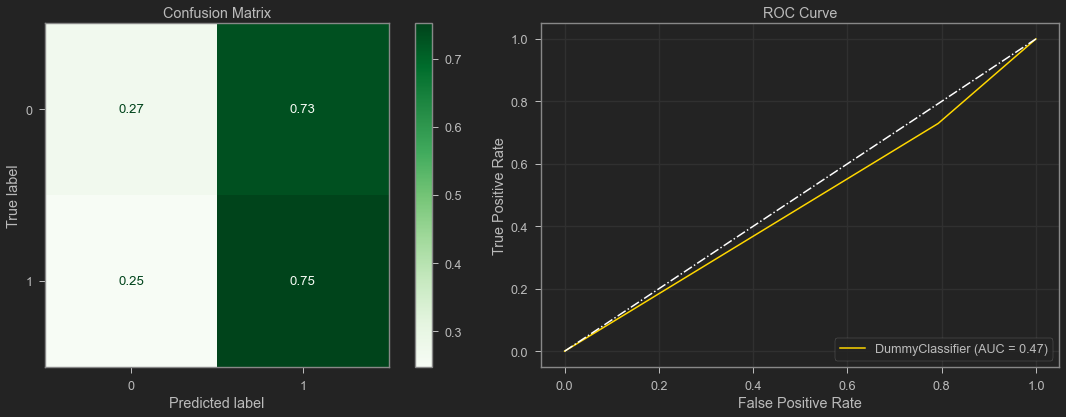

In [37]:
X_train_dummy = fun.df_preprocessing_pipeline(X_train).copy()
X_test_dummy = fun.df_preprocessing_pipeline(X_test).copy()

dummy_classifier = DummyClassifier(strategy='stratified')
print(f"""Class balance y_train: 
{y_train.value_counts(1)}
""")
print(f"""Class balance y_test: 
{y_test.value_counts(1)}
""")
print(f"""{'-'*30}""")
fun.model_report(dummy_classifier,
                 X_train=X_train_dummy,
                 y_train=y_train,
                 X_test=X_test_dummy,
                 y_test=y_test)

## logistic regression

In [38]:
X_train_log_reg = fun.df_preprocessing_pipeline(X_train, drop='first').copy()
X_test_log_reg = fun.df_preprocessing_pipeline(X_test, drop='first').copy()

******************************************************************************************
Train score: 0.7202
Test score: 0.6767
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    LogisticRegression(C=100000.0, class_weight='balanced', max_iter=1000)
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.44      0.71      0.54        82
           1       0.86      0.67      0.75       218

    accuracy                           0.68       300
   macro avg       0.65      0.69      0.65       300
weighted avg       0.74      0.68      0.69       300

************************************************************


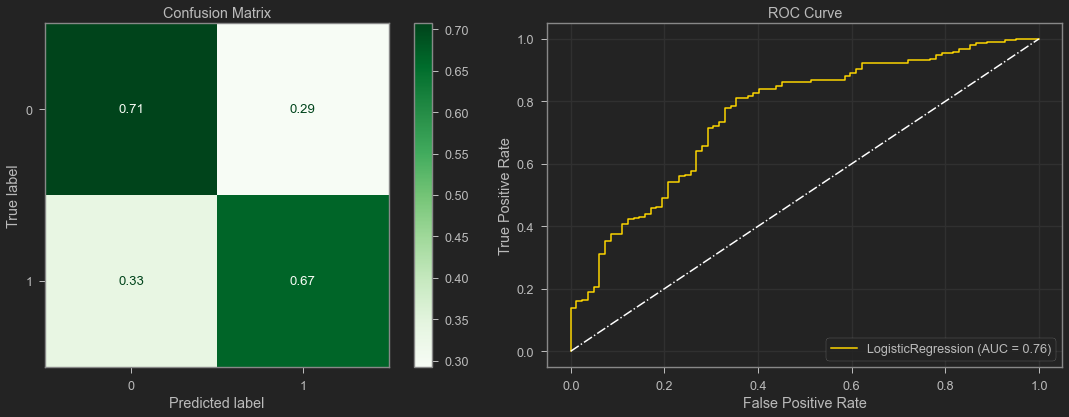

In [39]:
# logistic regression classifier
logreg = LogisticRegression(C=1e5, max_iter=1000, class_weight='balanced')
# score of logistic regression classifier
fun.model_report(logreg,
             X_train=X_train_log_reg,
             y_train=y_train,
             X_test=X_test_log_reg,
             y_test=y_test)

In [40]:
# fit logistic regression classifier to train data
logreg.fit(X_train_log_reg, y_train)
logreg.predict_proba(X_train_log_reg)

array([[0.23037106, 0.76962894],
       [0.31361695, 0.68638305],
       [0.2556652 , 0.7443348 ],
       ...,
       [0.71141916, 0.28858084],
       [0.31497379, 0.68502621],
       [0.51692088, 0.48307912]])

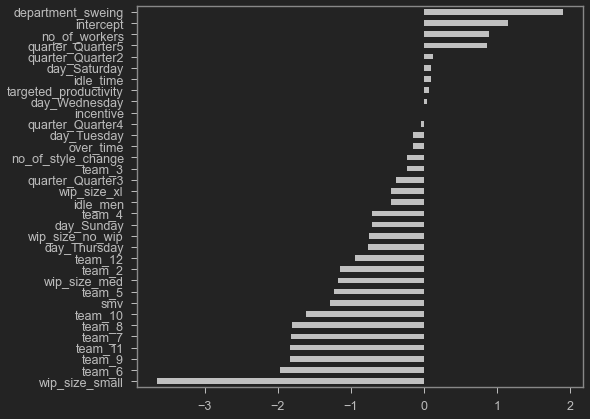

In [41]:
fun.coefficients_of_model_binary(
    logreg, X_train_log_reg, log_scale=True).sort_values().plot(kind='barh',color='silver');

### grid search with Cross Validation

In [42]:
logreg_gs = LogisticRegression(max_iter=1e4,
                               class_weight='balanced',
                               n_jobs=-1)
params = {
    'C': [.0001, .001, .01, .1, 10, 100, 1000, 10000, 1e6, 1e12],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
gridsearch_logreg = GridSearchCV(estimator=logreg_gs,
                                 param_grid=params,
                                 n_jobs=-1)
gridsearch_logreg

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000.0, n_jobs=-1),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000, 10000,
                               1000000.0, 1000000000000.0],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [43]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_logreg.fit(X_train_log_reg, y_train)
print(f"Best Parameters by gridsearch:\t{gridsearch_logreg.best_params_}")
print(f"Best Estimator by gridsearch:\t{gridsearch_logreg.best_estimator_}")

Best Parameters by gridsearch:	{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Estimator by gridsearch:	LogisticRegression(C=10, class_weight='balanced', max_iter=10000.0, n_jobs=-1,
                   solver='newton-cg')


******************************************************************************************
Train score: 0.7202
Test score: 0.68
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    LogisticRegression(C=10, class_weight='balanced', max_iter=10000.0, n_jobs=-1,
                   solver='newton-cg')
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.45      0.71      0.55        82
           1       0.86      0.67      0.75       218

    accuracy                           0.68       300
   macro avg       0.65      0.69      0.65       300
weighted avg       0.75      0.68      0.70       300

************************************************************


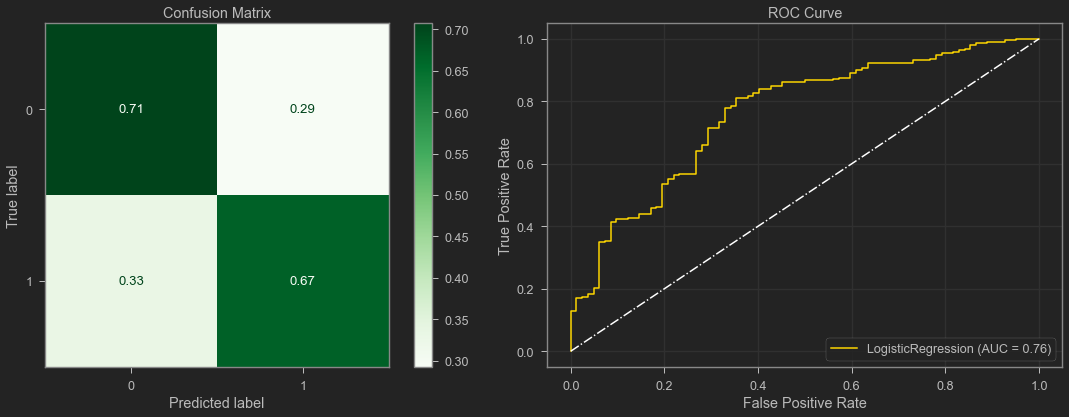

In [44]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    logreg_gs_best = gridsearch_logreg.best_estimator_
    fun.model_report(logreg_gs_best, X_train_log_reg, y_train, X_test_log_reg,
                 y_test)

## KNN

******************************************************************************************
Train score: 0.854
Test score: 0.7767
    Possible Overfitting, diffrence of scores 7.7299999999999995% crossed 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    KNeighborsClassifier()
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.43      0.51        82
           1       0.81      0.91      0.86       218

    accuracy                           0.78       300
   macro avg       0.72      0.67      0.68       300
weighted avg       0.76      0.78      0.76       300

************************************************************


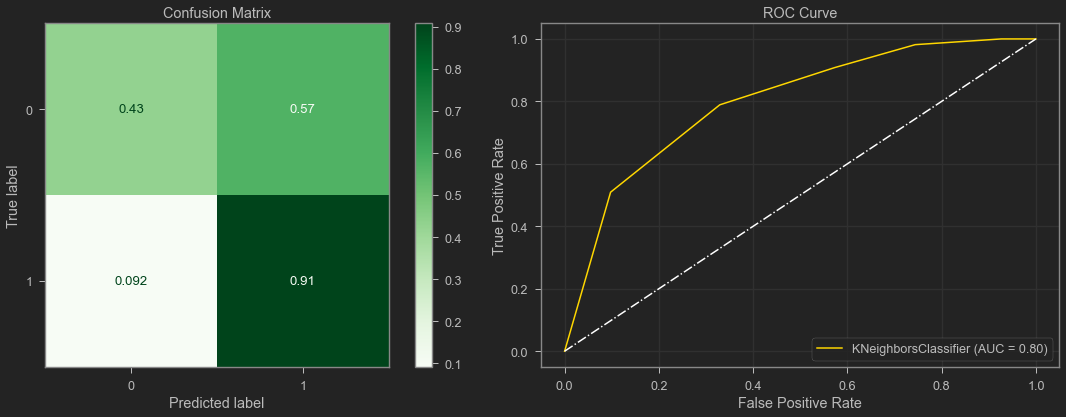

In [45]:
X_train_knn = fun.df_preprocessing_pipeline(X_train).copy()
X_test_knn = fun.df_preprocessing_pipeline(X_test).copy()

knn = KNeighborsClassifier()
fun.model_report(knn, X_train_knn, y_train, X_test_knn,
             y_test)

### grid search with Cross Validation

In [46]:
knn_gs = KNeighborsClassifier(n_jobs=-1)
params = {
    'n_neighbors': list(range(1, 21, 2)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'metric': ['minkowski', 'manhattan', 'euclidean']
}
gridsearch_knn = GridSearchCV(estimator=knn_gs,
                              param_grid=params,
                              n_jobs=-1,
                              scoring='recall')
gridsearch_knn

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='recall')

Best Parameters by gridsearch:	{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 19, 'p': 2, 'weights': 'distance'}
Best Estimator by gridsearch:	KNeighborsClassifier(n_jobs=-1, n_neighbors=19, weights='distance')


******************************************************************************************
Train score: 1.0
Test score: 0.7667
    Possible Overfitting, diffrence of scores 23.330000000000002% crossed 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    KNeighborsClassifier(n_jobs=-1, n_neighbors=19, weights='distance')
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.24      0.36        82
           1       0.77      0.96      0.86       218

    accuracy                           0.77       300
   macro avg       0.74      0.60      0.61       300
weighted avg       0.76      0.77      0.72       300

************************************************************


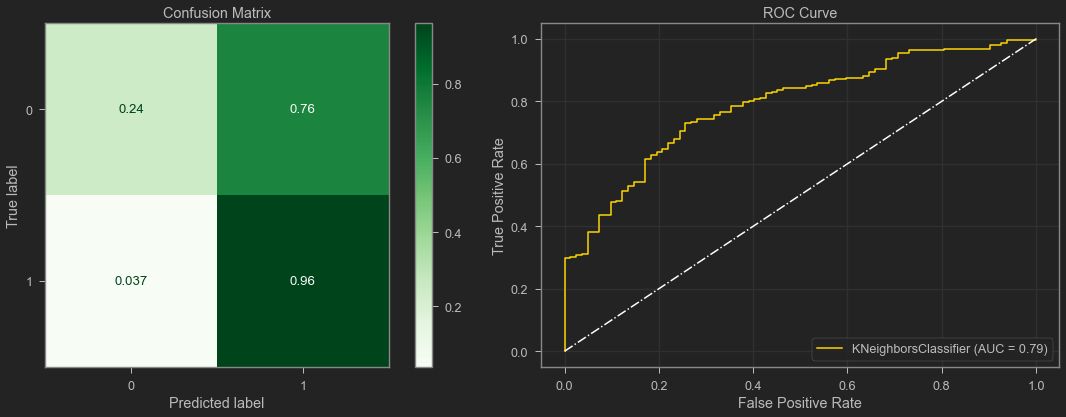

In [47]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_knn.fit(X_train_knn, y_train)
print(f"Best Parameters by gridsearch:\t{gridsearch_knn.best_params_}")
print(f"Best Estimator by gridsearch:\t{gridsearch_knn.best_estimator_}")

knn_gs_best = gridsearch_knn.best_estimator_
fun.model_report(knn_gs_best, X_train_knn, y_train, X_test_knn,
             y_test)

## ensemble methods

In [48]:
X_train_xg = fun.df_preprocessing_pipeline(X_train).copy()
X_test_xg = fun.df_preprocessing_pipeline(X_test).copy()

### Random forest

In [49]:
rf_clf = RandomForestClassifier()

******************************************************************************************
Train score: 1.0
Test score: 0.8167
    Possible Overfitting, diffrence of scores 18.33% crossed 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    RandomForestClassifier()
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.63      0.65        82
           1       0.87      0.89      0.88       218

    accuracy                           0.82       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.81      0.82      0.81       300

************************************************************


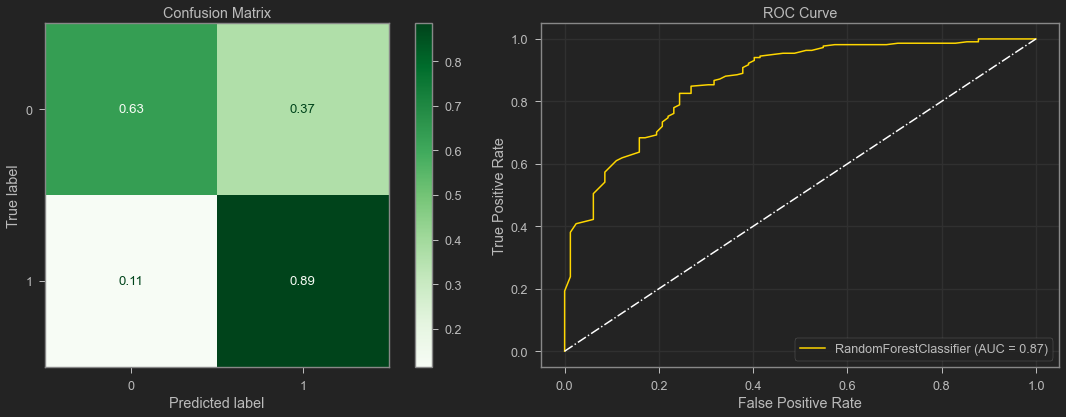

In [50]:
fun.model_report(rf_clf, X_train_xg, y_train, X_test_xg,
             y_test)

### XGBClassifier

******************************************************************************************
Train score: 0.9944
Test score: 0.81
    Possible Overfitting, diffrence of scores 18.44% crossed 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
------------------------------

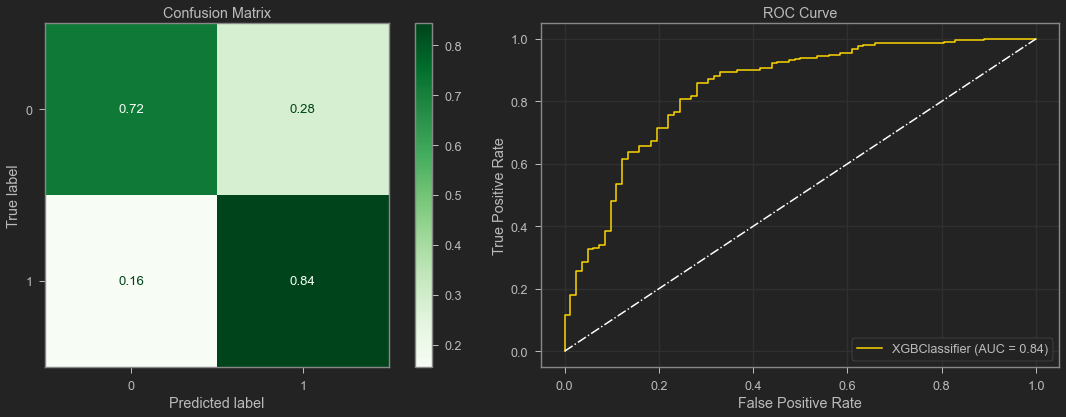

In [51]:
xgg_clf = XGBClassifier()
fun.model_report(xgg_clf, X_train_xg, y_train, X_test_xg,
             y_test)

### XGBRFClassifier

******************************************************************************************
Train score: 0.8685
Test score: 0.81
    Possible Overfitting, diffrence of scores 5.8500000000000005% crossed 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)
--------------------------------------------

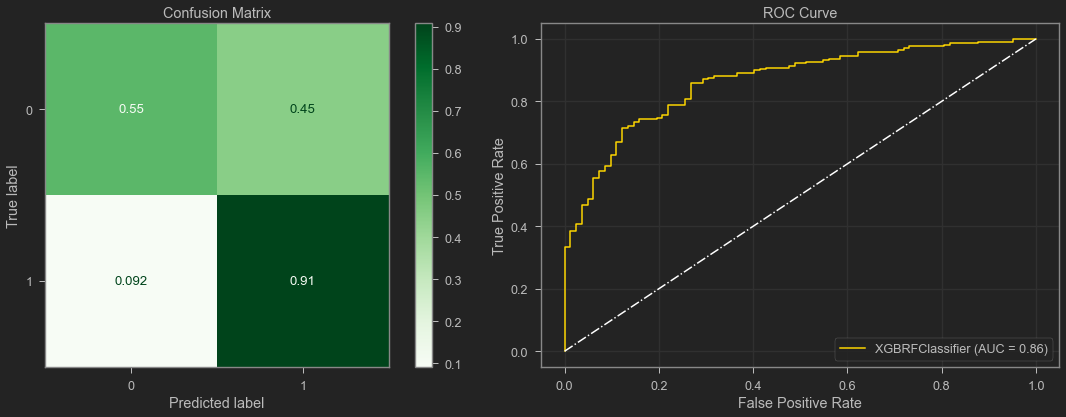

In [52]:
xgg_rf_clf = XGBRFClassifier()
fun.model_report(xgg_rf_clf, X_train_xg, y_train, X_test_xg,
             y_test)

## SVM

In [47]:
X_train_svm = fun.df_preprocessing_pipeline(X_train).copy()
X_test_svm = fun.df_preprocessing_pipeline(X_test).copy()

### lin

******************************************************************************************
Train score: 0.7135
Test score: 0.67
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    SVC(C=1, class_weight='balanced', kernel='linear')
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.44      0.71      0.54        82
           1       0.86      0.66      0.74       218

    accuracy                           0.67       300
   macro avg       0.65      0.68      0.64       300
weighted avg       0.74      0.67      0.69       300

************************************************************


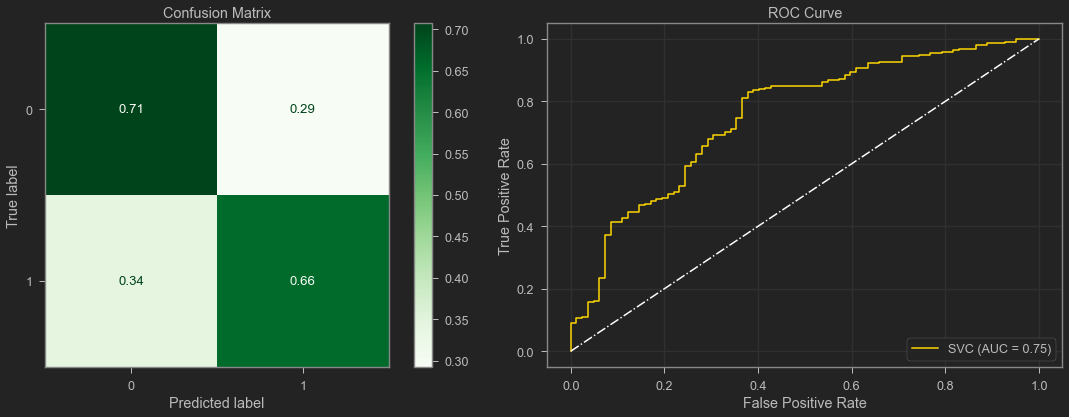

In [54]:
svc_linear = SVC(kernel='linear', C=1,class_weight='balanced')
fun.model_report(svc_linear, X_train_svm, y_train, X_test_svm,
             y_test)

### rbf

******************************************************************************************
Train score: 0.7804
Test score: 0.7267
    Possible Overfitting, diffrence of scores 5.37% crossed 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    SVC(C=1, class_weight='balanced')
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.68      0.58        82
           1       0.86      0.74      0.80       218

    accuracy                           0.73       300
   macro avg       0.68      0.71      0.69       300
weighted avg       0.76      0.73      0.74       300

************************************************************


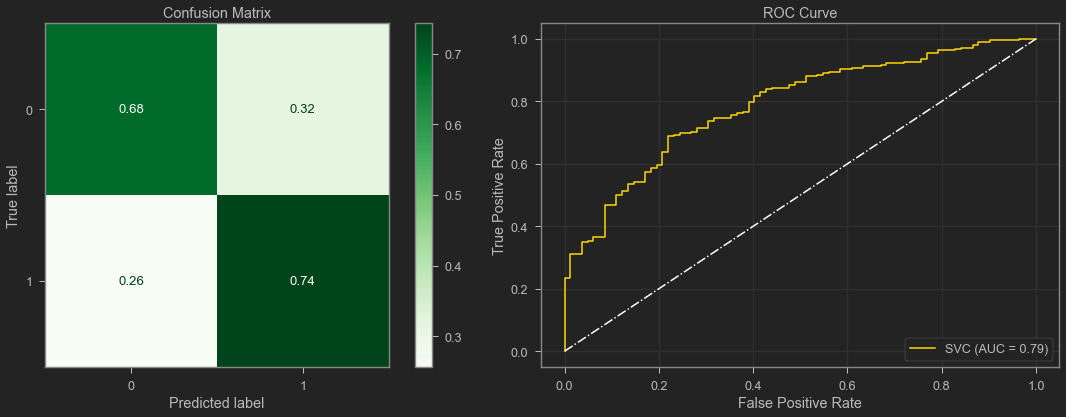

In [55]:
svc_rbf = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced')
fun.model_report(svc_rbf, X_train_svm, y_train, X_test_svm,
             y_test)

### poly 

******************************************************************************************
Train score: 0.8116
Test score: 0.73
    Possible Overfitting, diffrence of scores 8.16% crossed 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    SVC(C=1, class_weight='balanced', degree=8, kernel='poly')
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.52      0.51        82
           1       0.82      0.81      0.81       218

    accuracy                           0.73       300
   macro avg       0.66      0.67      0.66       300
weighted avg       0.73      0.73      0.73       300

************************************************************


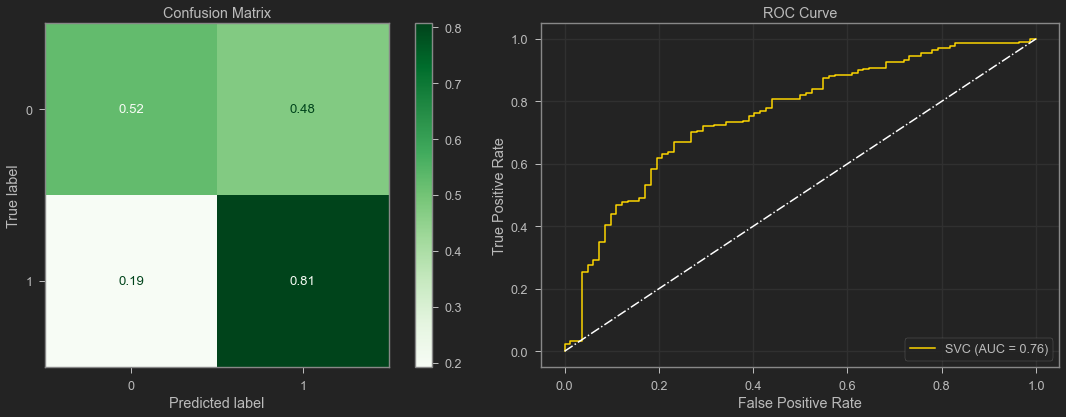

In [56]:
svc_poly = SVC(kernel='poly',
               degree=8,
               C=1,
               gamma='scale',
               class_weight='balanced')
fun.model_report(svc_poly, X_train_svm, y_train, X_test_svm,
             y_test)

### sigmoid

******************************************************************************************
Train score: 0.6109
Test score: 0.6033
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    SVC(C=2, class_weight='balanced', kernel='sigmoid')
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.38      0.70      0.49        82
           1       0.83      0.57      0.68       218

    accuracy                           0.60       300
   macro avg       0.60      0.63      0.58       300
weighted avg       0.71      0.60      0.62       300

************************************************************


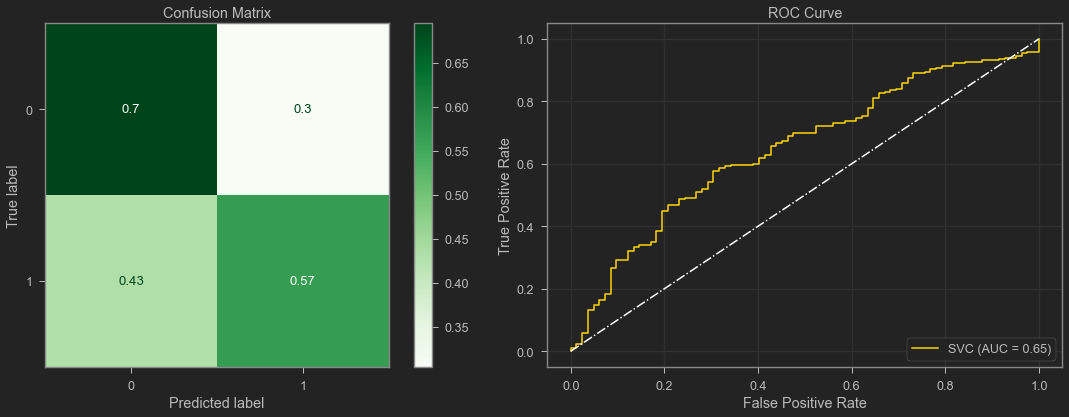

In [57]:
svc_sig = SVC(kernel='sigmoid', C=2, class_weight='balanced')
fun.model_report(svc_sig, X_train_svm, y_train, X_test_svm,
             y_test)

## catboost

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7577055	test: 0.7682367	best: 0.7682367 (0)	total: 59.8ms	remaining: 59.7s
1:	learn: 0.7813515	test: 0.7485456	best: 0.7682367 (0)	total: 106ms	remaining: 53s
2:	learn: 0.8092751	test: 0.7819143	best: 0.7819143 (2)	total: 163ms	remaining: 54s
3:	learn: 0.8335934	test: 0.7871448	best: 0.7871448 (3)	total: 209ms	remaining: 52s
4:	learn: 0.8369324	test: 0.7906691	best: 0.7906691 (4)	total: 274ms	remaining: 54.5s
5:	learn: 0.8665620	test: 0.7960953	best: 0.7960953 (5)	total: 340ms	remaining: 56.4s
6:	learn: 0.8812341	test: 0.7859420	best: 0.7960953 (5)	total: 407ms	remaining: 57.7s
7:	learn: 0.8843068	test: 0.7970183	best: 0.7970183 (7)	total: 463ms	remaining: 57.4s
8:	learn: 0.8943747	test: 0.7691877	best: 0.7970183 (7)	total: 526ms	remaining: 57.9s
9:	learn: 0.9035229	test: 0.7653838	best: 0.7970183 (7)	total: 582ms	remaining: 57.6s
10:	learn: 0.9053368	test: 0.7646006	best: 0.7970183 (7)	total: 636ms	remaining: 57.2s
11:	learn: 0.9084316	test: 0.7691038	best: 0.7970183 (7)	t

96:	learn: 0.9863331	test: 0.7486574	best: 0.7970183 (7)	total: 4.99s	remaining: 46.4s
97:	learn: 0.9864092	test: 0.7484336	best: 0.7970183 (7)	total: 5.03s	remaining: 46.3s
98:	learn: 0.9867136	test: 0.7477064	best: 0.7970183 (7)	total: 5.08s	remaining: 46.3s
99:	learn: 0.9866756	test: 0.7475945	best: 0.7970183 (7)	total: 5.13s	remaining: 46.1s
100:	learn: 0.9866375	test: 0.7477064	best: 0.7970183 (7)	total: 5.17s	remaining: 46s
101:	learn: 0.9869927	test: 0.7507831	best: 0.7970183 (7)	total: 5.22s	remaining: 45.9s
102:	learn: 0.9870054	test: 0.7507831	best: 0.7970183 (7)	total: 5.26s	remaining: 45.8s
103:	learn: 0.9868594	test: 0.7507272	best: 0.7970183 (7)	total: 5.31s	remaining: 45.7s
104:	learn: 0.9870751	test: 0.7505594	best: 0.7970183 (7)	total: 5.36s	remaining: 45.7s
105:	learn: 0.9875888	test: 0.7505594	best: 0.7970183 (7)	total: 5.4s	remaining: 45.6s
106:	learn: 0.9876713	test: 0.7499440	best: 0.7970183 (7)	total: 5.46s	remaining: 45.5s
107:	learn: 0.9876269	test: 0.7504475	b

190:	learn: 0.9968988	test: 0.7626986	best: 0.7970183 (7)	total: 9.63s	remaining: 40.8s
191:	learn: 0.9968544	test: 0.7629783	best: 0.7970183 (7)	total: 9.68s	remaining: 40.7s
192:	learn: 0.9968734	test: 0.7629783	best: 0.7970183 (7)	total: 9.73s	remaining: 40.7s
193:	learn: 0.9970193	test: 0.7625867	best: 0.7970183 (7)	total: 9.79s	remaining: 40.7s
194:	learn: 0.9970954	test: 0.7632021	best: 0.7970183 (7)	total: 9.83s	remaining: 40.6s
195:	learn: 0.9971588	test: 0.7614679	best: 0.7970183 (7)	total: 9.89s	remaining: 40.6s
196:	learn: 0.9972666	test: 0.7623070	best: 0.7970183 (7)	total: 9.93s	remaining: 40.5s
197:	learn: 0.9973364	test: 0.7630902	best: 0.7970183 (7)	total: 9.99s	remaining: 40.5s
198:	learn: 0.9974695	test: 0.7609644	best: 0.7970183 (7)	total: 10s	remaining: 40.4s
199:	learn: 0.9974568	test: 0.7603491	best: 0.7970183 (7)	total: 10.1s	remaining: 40.4s
200:	learn: 0.9974886	test: 0.7621951	best: 0.7970183 (7)	total: 10.2s	remaining: 40.4s
201:	learn: 0.9978881	test: 0.7691

287:	learn: 0.9995244	test: 0.7614120	best: 0.7970183 (7)	total: 14.5s	remaining: 35.8s
288:	learn: 0.9995307	test: 0.7647684	best: 0.7970183 (7)	total: 14.5s	remaining: 35.8s
289:	learn: 0.9995180	test: 0.7657753	best: 0.7970183 (7)	total: 14.6s	remaining: 35.7s
290:	learn: 0.9995244	test: 0.7622511	best: 0.7970183 (7)	total: 14.7s	remaining: 35.7s
291:	learn: 0.9995117	test: 0.7614679	best: 0.7970183 (7)	total: 14.7s	remaining: 35.7s
292:	learn: 0.9995117	test: 0.7611322	best: 0.7970183 (7)	total: 14.8s	remaining: 35.6s
293:	learn: 0.9995878	test: 0.7588387	best: 0.7970183 (7)	total: 14.8s	remaining: 35.6s
294:	learn: 0.9996449	test: 0.7587268	best: 0.7970183 (7)	total: 14.9s	remaining: 35.5s
295:	learn: 0.9996449	test: 0.7587268	best: 0.7970183 (7)	total: 14.9s	remaining: 35.5s
296:	learn: 0.9996449	test: 0.7595100	best: 0.7970183 (7)	total: 15s	remaining: 35.4s
297:	learn: 0.9996639	test: 0.7577758	best: 0.7970183 (7)	total: 15s	remaining: 35.4s
298:	learn: 0.9997083	test: 0.764320

384:	learn: 1.0000000	test: 0.7441822	best: 0.7970183 (7)	total: 19.4s	remaining: 30.9s
385:	learn: 1.0000000	test: 0.7436787	best: 0.7970183 (7)	total: 19.4s	remaining: 30.9s
386:	learn: 1.0000000	test: 0.7427277	best: 0.7970183 (7)	total: 19.4s	remaining: 30.8s
387:	learn: 1.0000000	test: 0.7425039	best: 0.7970183 (7)	total: 19.5s	remaining: 30.8s
388:	learn: 1.0000000	test: 0.7425039	best: 0.7970183 (7)	total: 19.5s	remaining: 30.7s
389:	learn: 1.0000000	test: 0.7453569	best: 0.7970183 (7)	total: 19.6s	remaining: 30.7s
390:	learn: 1.0000000	test: 0.7444618	best: 0.7970183 (7)	total: 19.6s	remaining: 30.6s
391:	learn: 1.0000000	test: 0.7452450	best: 0.7970183 (7)	total: 19.7s	remaining: 30.5s
392:	learn: 1.0000000	test: 0.7469792	best: 0.7970183 (7)	total: 19.7s	remaining: 30.5s
393:	learn: 1.0000000	test: 0.7477624	best: 0.7970183 (7)	total: 19.8s	remaining: 30.4s
394:	learn: 1.0000000	test: 0.7480420	best: 0.7970183 (7)	total: 19.8s	remaining: 30.3s
395:	learn: 1.0000000	test: 0.74

480:	learn: 1.0000000	test: 0.7449653	best: 0.7970183 (7)	total: 24.2s	remaining: 26.2s
481:	learn: 1.0000000	test: 0.7447416	best: 0.7970183 (7)	total: 24.3s	remaining: 26.1s
482:	learn: 1.0000000	test: 0.7462519	best: 0.7970183 (7)	total: 24.3s	remaining: 26s
483:	learn: 1.0000000	test: 0.7479302	best: 0.7970183 (7)	total: 24.4s	remaining: 26s
484:	learn: 1.0000000	test: 0.7475945	best: 0.7970183 (7)	total: 24.4s	remaining: 25.9s
485:	learn: 1.0000000	test: 0.7472029	best: 0.7970183 (7)	total: 24.5s	remaining: 25.9s
486:	learn: 1.0000000	test: 0.7476505	best: 0.7970183 (7)	total: 24.5s	remaining: 25.8s
487:	learn: 1.0000000	test: 0.7471470	best: 0.7970183 (7)	total: 24.6s	remaining: 25.8s
488:	learn: 1.0000000	test: 0.7468673	best: 0.7970183 (7)	total: 24.6s	remaining: 25.7s
489:	learn: 1.0000000	test: 0.7472029	best: 0.7970183 (7)	total: 24.7s	remaining: 25.7s
490:	learn: 1.0000000	test: 0.7466435	best: 0.7970183 (7)	total: 24.7s	remaining: 25.6s
491:	learn: 1.0000000	test: 0.746755

574:	learn: 1.0000000	test: 0.7450213	best: 0.7970183 (7)	total: 28.8s	remaining: 21.3s
575:	learn: 1.0000000	test: 0.7450213	best: 0.7970183 (7)	total: 28.9s	remaining: 21.3s
576:	learn: 1.0000000	test: 0.7449653	best: 0.7970183 (7)	total: 29s	remaining: 21.2s
577:	learn: 1.0000000	test: 0.7449653	best: 0.7970183 (7)	total: 29s	remaining: 21.2s
578:	learn: 1.0000000	test: 0.7454128	best: 0.7970183 (7)	total: 29s	remaining: 21.1s
579:	learn: 1.0000000	test: 0.7458044	best: 0.7970183 (7)	total: 29.1s	remaining: 21.1s
580:	learn: 1.0000000	test: 0.7457485	best: 0.7970183 (7)	total: 29.1s	remaining: 21s
581:	learn: 1.0000000	test: 0.7465317	best: 0.7970183 (7)	total: 29.2s	remaining: 21s
582:	learn: 1.0000000	test: 0.7465317	best: 0.7970183 (7)	total: 29.2s	remaining: 20.9s
583:	learn: 1.0000000	test: 0.7473708	best: 0.7970183 (7)	total: 29.3s	remaining: 20.9s
584:	learn: 1.0000000	test: 0.7472029	best: 0.7970183 (7)	total: 29.4s	remaining: 20.8s
585:	learn: 1.0000000	test: 0.7472029	best

670:	learn: 1.0000000	test: 0.7492728	best: 0.7970183 (7)	total: 33.6s	remaining: 16.5s
671:	learn: 1.0000000	test: 0.7486015	best: 0.7970183 (7)	total: 33.7s	remaining: 16.4s
672:	learn: 1.0000000	test: 0.7487693	best: 0.7970183 (7)	total: 33.7s	remaining: 16.4s
673:	learn: 1.0000000	test: 0.7487693	best: 0.7970183 (7)	total: 33.8s	remaining: 16.3s
674:	learn: 1.0000000	test: 0.7487693	best: 0.7970183 (7)	total: 33.8s	remaining: 16.3s
675:	learn: 1.0000000	test: 0.7488253	best: 0.7970183 (7)	total: 33.9s	remaining: 16.2s
676:	learn: 1.0000000	test: 0.7492169	best: 0.7970183 (7)	total: 33.9s	remaining: 16.2s
677:	learn: 1.0000000	test: 0.7494406	best: 0.7970183 (7)	total: 34s	remaining: 16.1s
678:	learn: 1.0000000	test: 0.7494406	best: 0.7970183 (7)	total: 34s	remaining: 16.1s
679:	learn: 1.0000000	test: 0.7494406	best: 0.7970183 (7)	total: 34s	remaining: 16s
680:	learn: 1.0000000	test: 0.7504475	best: 0.7970183 (7)	total: 34.1s	remaining: 16s
681:	learn: 1.0000000	test: 0.7503356	best

766:	learn: 1.0000000	test: 0.7525733	best: 0.7970183 (7)	total: 38.2s	remaining: 11.6s
767:	learn: 1.0000000	test: 0.7521817	best: 0.7970183 (7)	total: 38.2s	remaining: 11.5s
768:	learn: 1.0000000	test: 0.7517342	best: 0.7970183 (7)	total: 38.3s	remaining: 11.5s
769:	learn: 1.0000000	test: 0.7520698	best: 0.7970183 (7)	total: 38.3s	remaining: 11.4s
770:	learn: 1.0000000	test: 0.7523495	best: 0.7970183 (7)	total: 38.4s	remaining: 11.4s
771:	learn: 1.0000000	test: 0.7521257	best: 0.7970183 (7)	total: 38.4s	remaining: 11.3s
772:	learn: 1.0000000	test: 0.7521257	best: 0.7970183 (7)	total: 38.5s	remaining: 11.3s
773:	learn: 1.0000000	test: 0.7520698	best: 0.7970183 (7)	total: 38.5s	remaining: 11.2s
774:	learn: 1.0000000	test: 0.7516223	best: 0.7970183 (7)	total: 38.6s	remaining: 11.2s
775:	learn: 1.0000000	test: 0.7516223	best: 0.7970183 (7)	total: 38.6s	remaining: 11.1s
776:	learn: 1.0000000	test: 0.7510629	best: 0.7970183 (7)	total: 38.7s	remaining: 11.1s
777:	learn: 1.0000000	test: 0.75

861:	learn: 1.0000000	test: 0.7558738	best: 0.7970183 (7)	total: 42.7s	remaining: 6.84s
862:	learn: 1.0000000	test: 0.7558738	best: 0.7970183 (7)	total: 42.7s	remaining: 6.79s
863:	learn: 1.0000000	test: 0.7573842	best: 0.7970183 (7)	total: 42.8s	remaining: 6.74s
864:	learn: 1.0000000	test: 0.7574961	best: 0.7970183 (7)	total: 42.8s	remaining: 6.68s
865:	learn: 1.0000000	test: 0.7574961	best: 0.7970183 (7)	total: 42.9s	remaining: 6.63s
866:	learn: 1.0000000	test: 0.7574961	best: 0.7970183 (7)	total: 42.9s	remaining: 6.58s
867:	learn: 1.0000000	test: 0.7564332	best: 0.7970183 (7)	total: 43s	remaining: 6.53s
868:	learn: 1.0000000	test: 0.7564332	best: 0.7970183 (7)	total: 43s	remaining: 6.48s
869:	learn: 1.0000000	test: 0.7566569	best: 0.7970183 (7)	total: 43s	remaining: 6.43s
870:	learn: 1.0000000	test: 0.7566569	best: 0.7970183 (7)	total: 43.1s	remaining: 6.38s
871:	learn: 1.0000000	test: 0.7566569	best: 0.7970183 (7)	total: 43.1s	remaining: 6.33s
872:	learn: 1.0000000	test: 0.7566569	

955:	learn: 1.0000000	test: 0.7574401	best: 0.7970183 (7)	total: 47.3s	remaining: 2.17s
956:	learn: 1.0000000	test: 0.7573283	best: 0.7970183 (7)	total: 47.3s	remaining: 2.13s
957:	learn: 1.0000000	test: 0.7573283	best: 0.7970183 (7)	total: 47.4s	remaining: 2.08s
958:	learn: 1.0000000	test: 0.7580555	best: 0.7970183 (7)	total: 47.4s	remaining: 2.03s
959:	learn: 1.0000000	test: 0.7576639	best: 0.7970183 (7)	total: 47.5s	remaining: 1.98s
960:	learn: 1.0000000	test: 0.7574961	best: 0.7970183 (7)	total: 47.5s	remaining: 1.93s
961:	learn: 1.0000000	test: 0.7572723	best: 0.7970183 (7)	total: 47.6s	remaining: 1.88s
962:	learn: 1.0000000	test: 0.7569926	best: 0.7970183 (7)	total: 47.6s	remaining: 1.83s
963:	learn: 1.0000000	test: 0.7571604	best: 0.7970183 (7)	total: 47.7s	remaining: 1.78s
964:	learn: 1.0000000	test: 0.7571045	best: 0.7970183 (7)	total: 47.7s	remaining: 1.73s
965:	learn: 1.0000000	test: 0.7572723	best: 0.7970183 (7)	total: 47.8s	remaining: 1.68s
966:	learn: 1.0000000	test: 0.75

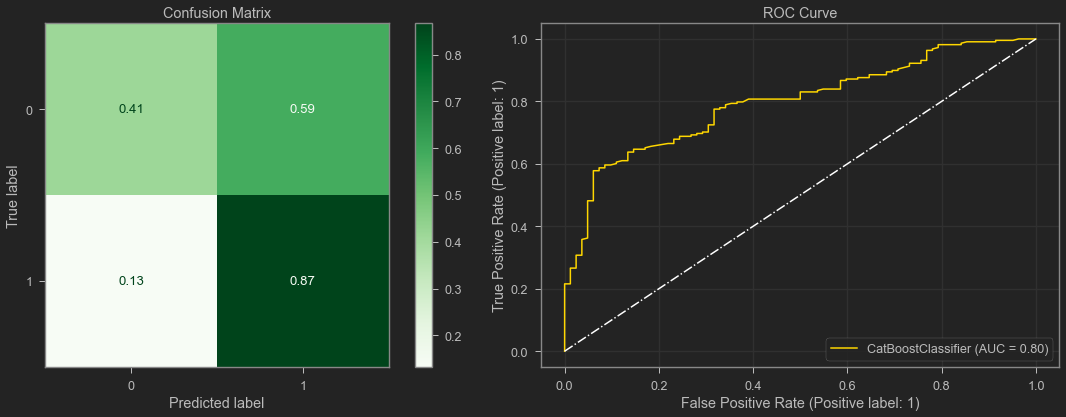

In [85]:
from catboost import CatBoostRegressor, CatBoostClassifier

model = CatBoostClassifier(task_type='GPU',
                           learning_rate=1,
                           depth=6,
#                            logging_level='Silent',
                           auto_class_weights='SqrtBalanced',
                           eval_metric='AUC')
model

cat_features = list(X_train.select_dtypes('category').columns)

model.fit(X_train,
          y_train,
          cat_features=cat_features,
          eval_set=(X_test, y_test),
          plot=True,use_best_model=True
         )
print(f'{"-"*90}')
print(metrics.classification_report(y_test, model.predict(X_test)))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
metrics.plot_confusion_matrix(model,
                              X_test,
                              y_test,
                              cmap='Greens',
                              normalize='true',
                              ax=ax[0])
ax[0].title.set_text('Confusion Matrix')
metrics.plot_roc_curve(model, X_test, y_test, color='gold', ax=ax[1])
ax[1].plot([0, 1], [0, 1], ls='-.', color='white')
ax[1].grid()
ax[1].title.set_text('ROC Curve')

plt.tight_layout()
plt.show()

# INTERPRET

# RECOMMENDATION

# NEXT STEPS

# APPENDIX

## all functions from the `functions.py`